Breast Cancer dataset is a binary classification task. The following code is using a simple logistic regression classifier to predict the class of each sample. Please use the metrics you learn, e.g., accuracy, precision, recall, F1, auc and ROC_curve, to evaluate the performance of the classifier.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np

X, y = load_breast_cancer(return_X_y=True)

X_train,X_test,y_train,y_test=train_test_split(
        X,y,test_size=0.2, random_state=0)

lr=LogisticRegression(solver='lbfgs', max_iter=8000)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
y_conf=lr.predict_proba(X_test)

0.9841269841269841
0.9253731343283582
0.9538461538461538
0.9473684210526315


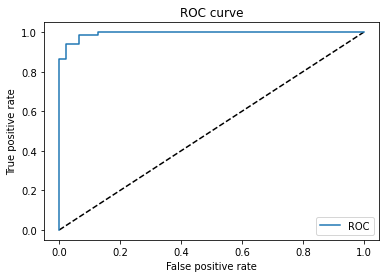

In [2]:
# *Solutions Examples
from sklearn.datasets import load_breast_cancer
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np

#load breast cancer data
X, y = load_breast_cancer(return_X_y=True)

X_train,X_test,y_train,y_test=train_test_split(
        X,y,test_size=0.2, random_state=0)

#build logisticregressor
lr=LogisticRegression(solver='lbfgs', max_iter=8000)

#train and predict
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
y_conf=lr.predict_proba(X_test)

print(metrics.precision_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))
print(metrics.f1_score(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#use only confidence for target class to calculate ROC
fpr, tpr, thresholds = roc_curve(y_test, y_conf[:,1], pos_label=1)
# print(fpr)
# print(tpr)
# print(thresholds)
auc_score = roc_auc_score(y_test, np.argmax(y_conf,axis=1))
# print(auc_score)

from matplotlib import pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
# plt.show()
plt.savefig('lab1_task6.png')

